
#**Cloud Counselage Internship (Python)**#



# >> Uploading Dataset...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Upload your Excel sheet
from google.colab import files
uploaded = files.upload()

# Load it into DataFrame
df = pd.read_excel(next(iter(uploaded)))

# Quick preview
df.head()

Saving Python Data (1).xlsx to Python Data (1).xlsx


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [ ]:
df.columns

Index(['First Name', 'Email ID', 'Quantity', 'Events', 'Attendee Status',
       'College Name', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'City', 'CGPA',
       'Experience with python (Months)', 'Family Income',
       'Expected salary (Lac)', 'Leadership- skills'],
      dtype='object')

#*1. How many unique students are included in the dataset?*



In [ ]:
unique_students = df['Email ID'].nunique()
print("Unique students:", unique_students)


Unique students: 2157




#*2. What is the average GPA of the students?*


In [ ]:
average_gpa = df['CGPA'].mean()
print("Average GPA:", round(average_gpa, 2))


Average GPA: 8.04


#*3. What is the distribution of students across different graduation years?*

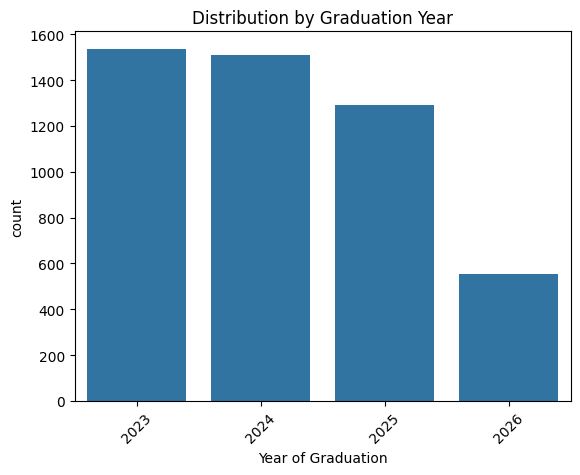

In [ ]:
sns.countplot(data=df, x='Year of Graduation')
plt.title('Distribution by Graduation Year')
plt.xticks(rotation=45)
plt.show()


#*4. What is the distribution of student’s experience with Python programming?*

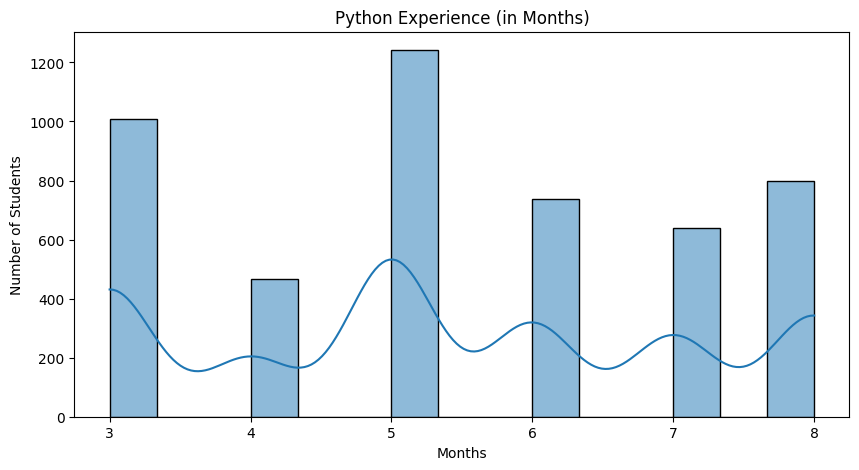

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Experience with python (Months)'], bins=15, kde=True)
plt.title('Python Experience (in Months)')
plt.xlabel('Months')
plt.ylabel('Number of Students')
plt.show()


#*5. What is the average family income of the students?*

In [ ]:
# Convert 'Family Income' column to numeric, handling Lakh and other symbols
def convert_income_to_numeric(income_str):
    if isinstance(income_str, str):  # Check if it's a string
        income_str = income_str.replace('Lakh', '00000')  # Replace 'Lakh' with '00000'
        income_str = income_str.replace('+', '')  # Remove '+' symbol
        income_str = income_str.replace('-', '')  # Remove '-' symbol
        # Split and sum if multiple incomes mentioned
        incomes = income_str.split(' ')
        total_income = 0
        for i in incomes:
          if i.isdigit():
            total_income = total_income + int(i)
        return int(total_income)  # convert to an integer
        # return int(total_income)
    else:
        return income_str  # keep the value if not string

df['Family Income'] = df['Family Income'].apply(convert_income_to_numeric)

# Now calculate the average income
avg_income = df['Family Income'].mean()
print("Average Family Income:", round(avg_income, 2))

Average Family Income: 3.93


#*6. How does the GPA vary among different colleges?*

In [ ]:
top5_colleges = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5)
print("Top 5 Colleges by Average GPA:")
print(top5_colleges)


Top 5 Colleges by Average GPA:
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


#*7. Are there any outliers in the ‘Attendee Status’ & ‘Quantity (courses completed)’ attribute?*

Attendee Status Values:
 Attendee Status
Attending    4882
NAN            12
Name: count, dtype: int64


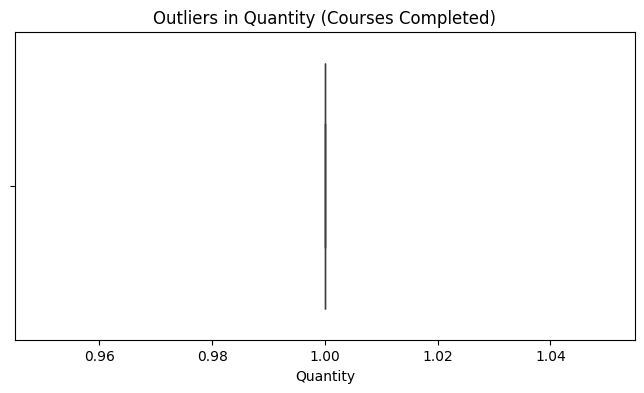

In [ ]:
# Attendee Status count (checking for unexpected values)
print("Attendee Status Values:\n", df['Attendee Status'].value_counts(dropna=False))

# Boxplot for Quantity to spot outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Quantity'])
plt.title('Outliers in Quantity (Courses Completed)')
plt.show()


#*8. What is the average GPA for students from each city?*

In [ ]:
gpa_by_city = df.groupby('City')['CGPA'].mean().sort_values(ascending=False)
print("Average GPA by City:")
print(gpa_by_city)


Average GPA by City:
City
Kolhapur     8.557143
Raipur       8.507143
Sonipat      8.464286
Gurugram     8.459259
Puri         8.450000
               ...   
Panipat      7.615385
Nashik       7.592857
Daman        7.421429
Rewari       7.392308
New Delhi    7.307143
Name: CGPA, Length: 177, dtype: float64


#*9. Can we identify any relationship between family income and GPA?*

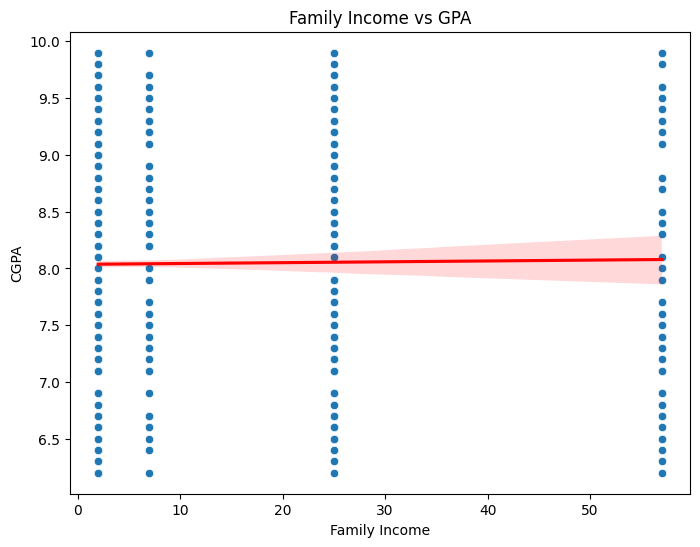

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Family Income', y='CGPA', data=df)
sns.regplot(x='Family Income', y='CGPA', data=df, scatter=False, color='red')
plt.title('Family Income vs GPA')
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.show()


#*10. How does the expected salary vary based on GPA, Family Income, Python Experience?*

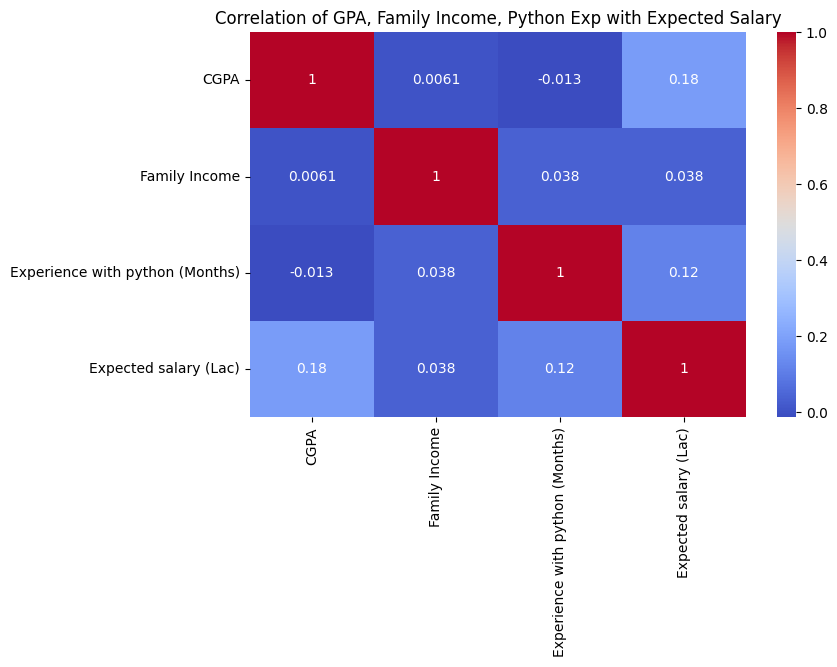

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the columns
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')
df['Family Income'] = pd.to_numeric(df['Family Income'], errors='coerce')
df['Experience with python (Months)'] = pd.to_numeric(df['Experience with python (Months)'], errors='coerce')
df['Expected salary (Lac)'] = pd.to_numeric(df['Expected salary (Lac)'], errors='coerce')

# Drop NA
salary_factors = df[['CGPA', 'Family Income', 'Experience with python (Months)', 'Expected salary (Lac)']].dropna()

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(salary_factors.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of GPA, Family Income, Python Exp with Expected Salary")
plt.show()


#*11. Which event tends to attract more students from specific fields of study?*

In [ ]:
# Let's try grouping by Designation and Events to see trends
event_field = df.groupby(['College Name', 'Events']).size().reset_index(name='Count')

# Sort and view top results
top_event_field = event_field.sort_values(by='Count', ascending=False).head(10)
print("Top 10 event-field of study combos attracting students:")
print(top_event_field)


Top 10 event-field of study combos attracting students:
                                          College Name  \
390      priyadarshini college of engineering, nagpur    
500        vidyalankar institute of technology, mumbai   
308     ld college of engineering, ahmedabad, gujarat    
166  b. k. birla college of arts, science & commerc...   
260                 government polytechnic gandhinagar   
276  kle society's college of bca, rls institute, b...   
532                                    wilson college    
212  dkte society's textile and engineering institu...   
516          vishwakarma institute of technology, pune   
498        vidyalankar institute of technology, mumbai   

                                      Events  Count  
390              Product Design & Full Stack     56  
500              Product Design & Full Stack     52  
308              Product Design & Full Stack     52  
166              Product Design & Full Stack     42  
260              Product Design & F

#*12. Do students in leadership positions tend to have higher GPAs or expected salaries?*

In [ ]:
# Filter valid data
df_filtered = df[['Leadership- skills', 'CGPA', 'Expected salary (Lac)']].dropna()

# Convert 'Leadership- skills' to numerical representation (e.g., 1 for 'yes', 0 for 'no')
df_filtered['Leadership- skills'] = df_filtered['Leadership- skills'].map({'yes': 1, 'no': 0})

# Students with leadership score above average
avg_leader = df_filtered['Leadership- skills'].mean()
leaders = df_filtered[df_filtered['Leadership- skills'] > avg_leader]

# Compare
print("Avg CGPA of leaders:", leaders['CGPA'].mean())
print("Avg expected salary of leaders:", leaders['Expected salary (Lac)'].mean())

Avg CGPA of leaders: 8.036787247087677
Avg expected salary of leaders: 13.971796443899448


#*13. Is there a correlation between leadership skills and expected salary?*

In [ ]:
# Convert to numeric
df['Leadership- skills'] = pd.to_numeric(df['Leadership- skills'], errors='coerce')
df['Expected salary (Lac)'] = pd.to_numeric(df['Expected salary (Lac)'], errors='coerce')

# Drop NA
leadership_data = df[['Leadership- skills', 'Expected salary (Lac)']].dropna()

# Calculate correlation
correlation = leadership_data.corr().iloc[0,1]
print("Correlation between leadership skills and expected salary:", correlation)


Correlation between leadership skills and expected salary: nan


#*14. How many students are graduating by the end of 2024?*

In [ ]:
# Clean and filter graduation year column
df['Year of Graduation'] = pd.to_numeric(df['Year of Graduation'], errors='coerce')
students_graduating_2024 = df[df['Year of Graduation'] <= 2024]

print("Number of students graduating by the end of 2024:", students_graduating_2024.shape[0])


Number of students graduating by the end of 2024: 3047


#*15. Which promotion channel brings in more student participation?*

In [ ]:
channel_counts = df['How did you come to know about this event?'].value_counts()

print("Student participation by promotion channel:\n")
print(channel_counts)


Student participation by promotion channel:

How did you come to know about this event?
Whatsapp                                          1067
Email                                              438
SPOC/ College Professor                            326
Others                                             153
Cloud Counselage Website                           129
                                                  ... 
Others | SPOC/ College Professor                     1
Youtube | Facebook | Whatsapp                        1
LinkedIn | Whatsapp | Cloud Counselage Website       1
Instagram | Whatsapp | Email | Others                1
Youtube | Whatsapp | Cloud Counselage Website        1
Name: count, Length: 99, dtype: int64


#*16: Total number of students who attended Data Science related events*

In [ ]:
# Convert column to lowercase for consistent checking
df['Events'] = df['Events'].astype(str).str.lower()

# Check if event contains 'data science'
data_sci_events = df[df['Events'].str.contains('data science', na=False)]

print("Total students who attended Data Science related events:", data_sci_events.shape[0])


Total students who attended Data Science related events: 306


#*17: Those with high CGPA & more Python experience — what was their average expected salary?*

In [ ]:
# Define threshold for "high" — top 25 percentile
cgpa_thresh = df['CGPA'].quantile(0.75)
python_exp_thresh = df['Experience with python (Months)'].quantile(0.75)

# Filter those high in both
high_performers = df[(df['CGPA'] >= cgpa_thresh) & (df['Experience with python (Months)'] >= python_exp_thresh)]

# Average salary
print("Average expected salary for high CGPA + high Python experience:", high_performers['Expected salary (Lac)'].mean())


Average expected salary for high CGPA + high Python experience: 20.64756446991404
